In [3]:
from pyspark import SparkConf,SparkContext
from random import random
sc=SparkContext()

num=10000000
result=sc.parallelize(range(num)).map(lambda i:(1 if random()**2+random()**2 <1 else 0 ))\
.reduce(lambda x,y:x+y)
print result*4.0/num

In [34]:
random()**2+random()**2<1

False

In [ ]:
from pyspark import SparkContext,SparkConf
from operator import add
from pyspark.sql import SparkSession
from pandas import *
import matplotlib.pyplot as plt
spark = SparkSession \
    .builder \
    .appName("pyspark") \
    .config("spark.some.config.option", "some-value") \
    .getOrCreate()
sc=spark.sparkContext

import sys
def fun(index,it): 
    for i in it:
        print ("%s => %s") %(index,i)
        yield ("%s => %s") %(index,i)
def seqOp(arg1,arg2):
    print "seqOp acc:%s,count:%s" %(arg1[0]+arg2,arg1[1]+1)
    return (arg1[0]+arg2,arg1[1]+1)

def combOp(arg1,arg2):
    return (arg1[0]+arg2[0],arg1[1]+arg2[1])

def seqOp2(arg1,arg2):
    print "arg1:%s,arg2:%s" %(arg1,arg2)
    maxone = arg1 if arg1>arg2 else arg2
    min = arg1 if arg1<arg2 else arg2
    print "maxone ",maxone
    return maxone

def combOp2(arg1,arg2):
    maxone = arg1 if arg1>arg2 else arg2
    print "comb  arg1:%s,arg2:%s,maxone:%s" %(arg1,arg2,maxone)
    return maxone 
rdd=sc.parallelize(range(10),4)
rdd.mapPartitionsWithIndex(fun).collect()
# rdd.aggregate((0,0),seqOp,combOp)
rdd.aggregate(4,seqOp2,combOp2)

# print rdd.collect()
# rdd.aggregate((0,1),lambda acc,value:(acc[0]+value,acc[1]+1),lambda acc1,acc2:(acc1[0]+acc2[0],acc2[1]+acc2[1]))

In [25]:
def fun1(*x):
    for i in x:
#         return x
#         print i
        yield i  

for i in (fun1(range(5))):
    print i 

[0, 1, 2, 3, 4]


In [32]:
import re
import pandas as pd
f=open("/home/yanbin/x.txt")
datas = f.readlines()
p=[]
for i in datas:
    p.append([float(x) for x in re.findall(r"\d+\.?\d*",i)])
df=pd.DataFrame(columns=["reg","rsme","maxiter","rank"],data=[x[:-1] for x in p])
df.groupby('reg')

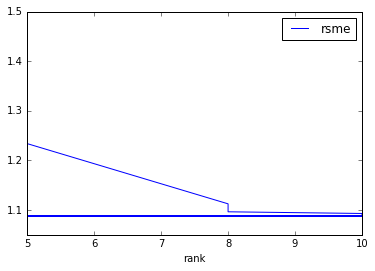

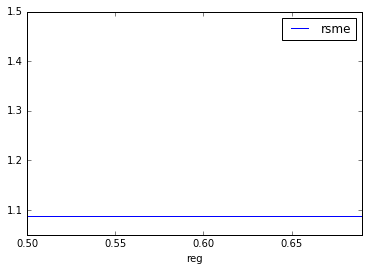

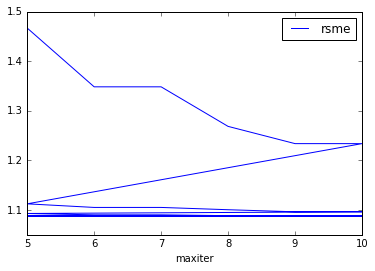

In [30]:
import matplotlib.pyplot as plt
df.plot(x=['rank'],y='rsme')
df.plot(x=['reg'],y='rsme')
df.plot(x=['maxiter'],y='rsme')
# plt.axis([0.5,0.7,1.08,1.09])
plt.show()

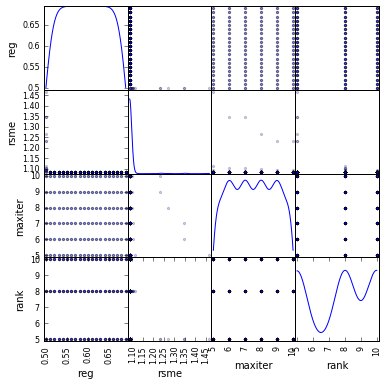

In [24]:
pd.scatter_matrix(df, alpha=0.2, figsize=(6, 6), diagonal='kde')
plt.show()